In [1]:
import pandas as pd
import numpy as np

file_path = '2018_Financial_Data.csv'
data = pd.read_csv(file_path)

In [2]:
# Calculate the average 'Revenue Growth' by sector
average_growth_by_sector = data.groupby('Sector')['Revenue Growth'].median().reset_index()

# Save the aggregated data to a new CSV file
average_growth_by_sector.to_csv('average_growth_by_sector.csv', index=False)

In [3]:
data.columns

Index(['Stock Ticker', 'Sector', '2019 PRICE VAR [%]', 'Revenue Growth',
       'Gross Margin', 'Operating Income', 'EBITDA Margin', 'Debt to Equity',
       'ROE', 'R&D Expense Growth', 'Free Cash Flow'],
      dtype='object')

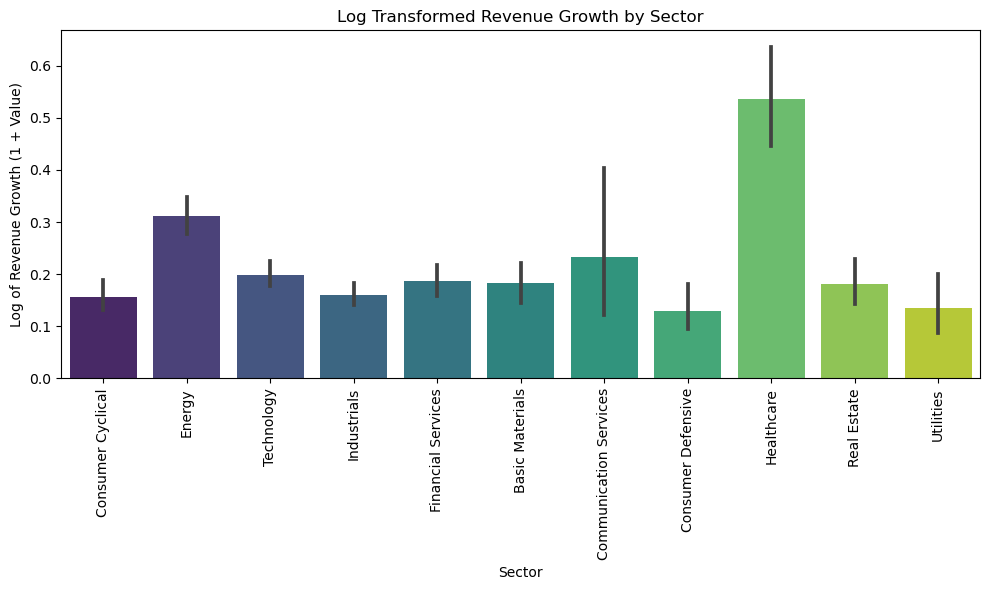

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

data = data[data['Revenue Growth'] > 0]
data['Revenue Growth Log'] = np.log1p(data['Revenue Growth'])

# Plotting the transformed data
plt.figure(figsize=(10, 6))
sns.barplot(x='Sector', y='Revenue Growth Log', data=data, palette='viridis')
plt.xticks(rotation=90)
plt.title('Log Transformed Revenue Growth by Sector')
plt.ylabel('Log of Revenue Growth (1 + Value)')
plt.xlabel('Sector')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()
plt.savefig("staticviz1")

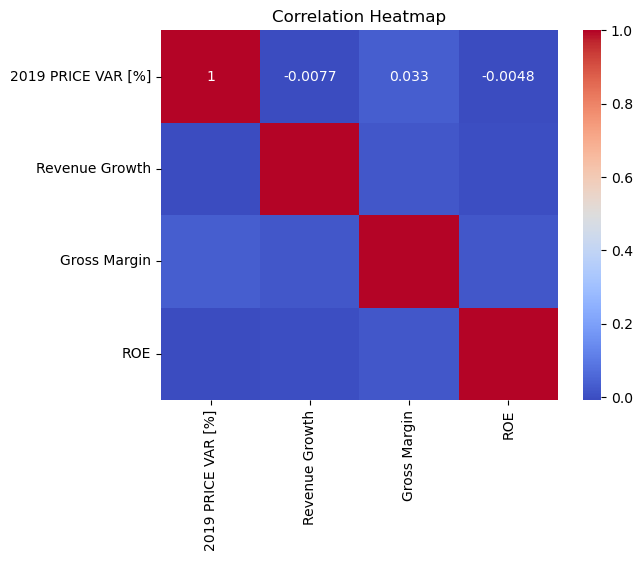

<Figure size 640x480 with 0 Axes>

In [10]:
# Assuming 'data' contains relevant financial metrics
correlation_matrix = data[['2019 PRICE VAR [%]', 'Revenue Growth', 'Gross Margin', 'ROE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.savefig("staticviz2")

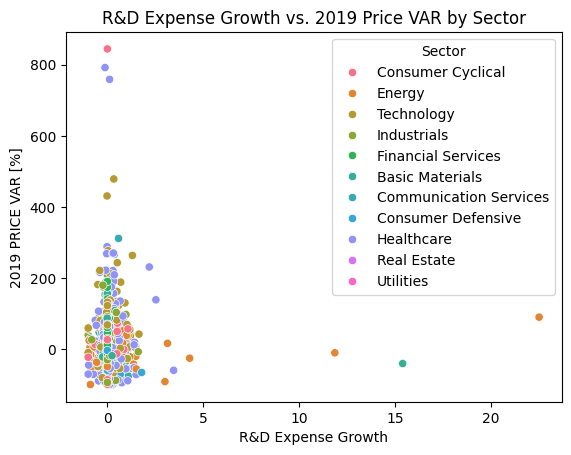

In [6]:
sns.scatterplot(x='R&D Expense Growth', y='2019 PRICE VAR [%]', hue='Sector', data=data)
plt.title('R&D Expense Growth vs. 2019 Price VAR by Sector')
plt.show()


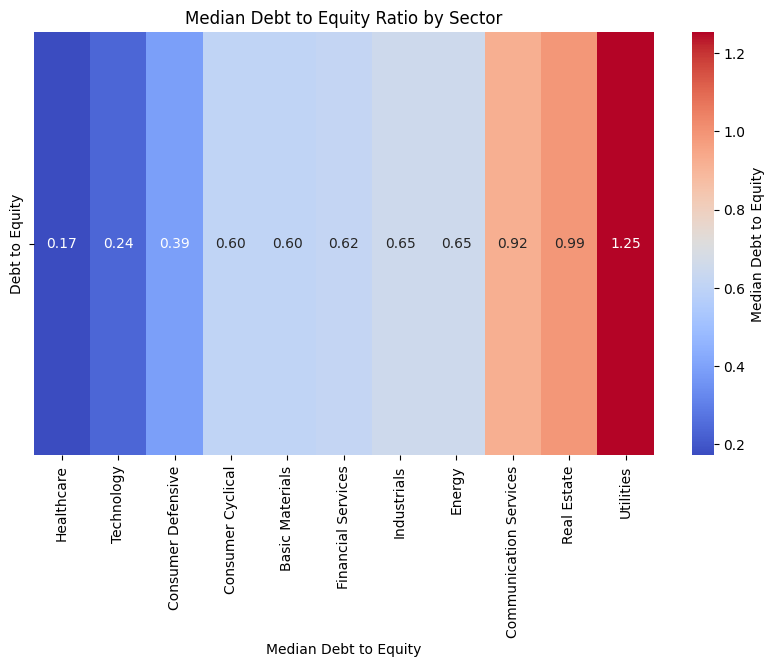

In [16]:
# Calculate the median 'Debt to Equity' ratio for each sector
debt_to_equity_by_sector = data.groupby('Sector')['Debt to Equity'].median().sort_values()

# Create a DataFrame for the heatmap
debt_to_equity_df = debt_to_equity_by_sector.reset_index()


plt.figure(figsize=(10, len(debt_to_equity_df) / 2)) 
sns.heatmap(debt_to_equity_df.set_index('Sector').T, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Median Debt to Equity'})
plt.title('Median Debt to Equity Ratio by Sector')
plt.xlabel('Median Debt to Equity')
plt.show()

/var/folders/br/nbs7ncxj59x1npxgfdy8bf180000gn/T/ipykernel_7559/24135836.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, horizontalalignment='right')
/var/folders/br/nbs7ncxj59x1npxgfdy8bf180000gn/T/ipykernel_7559/24135836.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, horizontalalignment='right')


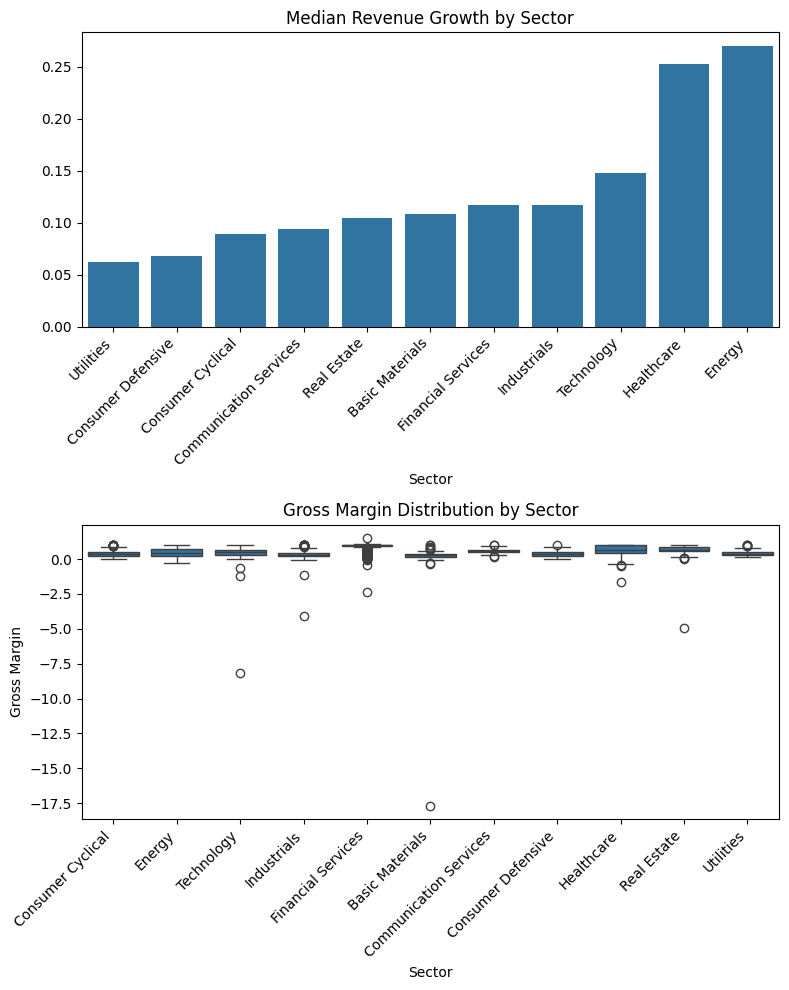

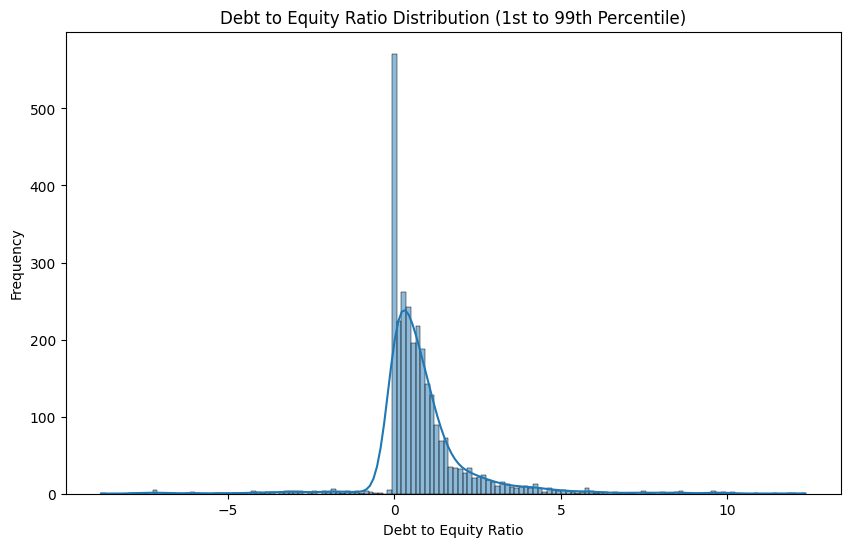

In [8]:
# Set up the matplotlib figure (2 rows, 1 column for the first two visualizations)
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Bar chart for median 'Revenue Growth' by sector
median_revenue_growth = data.groupby('Sector')['Revenue Growth'].median().sort_values()
sns.barplot(x=median_revenue_growth.index, y=median_revenue_growth.values, ax=axs[0])
axs[0].set_title('Median Revenue Growth by Sector')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, horizontalalignment='right')

# Box plot to show the distribution of 'Gross Margin' by sector
sns.boxplot(x='Sector', y='Gross Margin', data=data, ax=axs[1])
axs[1].set_title('Gross Margin Distribution by Sector')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust the layout
plt.tight_layout()
plt.show()

# Separate figure for the histogram (as it doesn't fit well in the 2x1 grid)
q_low = data['Debt to Equity'].quantile(0.01)
q_hi  = data['Debt to Equity'].quantile(0.99)

plt.figure(figsize=(10, 6))
sns.histplot(data[(data['Debt to Equity'] > q_low) & (data['Debt to Equity'] < q_hi)]['Debt to Equity'], kde=True)
plt.title('Debt to Equity Ratio Distribution (1st to 99th Percentile)')
plt.xlabel('Debt to Equity Ratio')
plt.ylabel('Frequency')
plt.show()


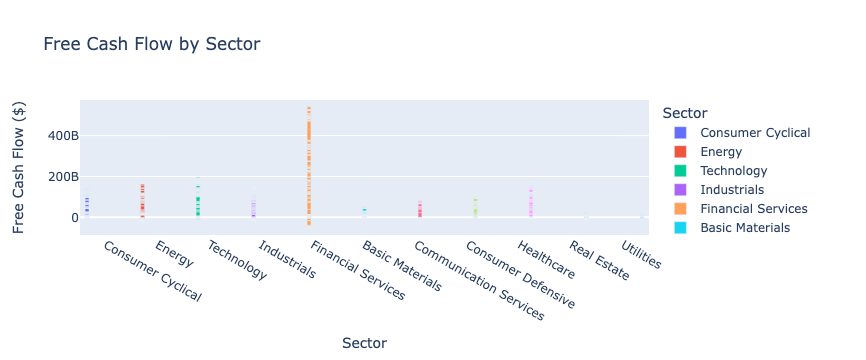

In [9]:
import plotly.express as px

# Interactive Bar Chart for 'Free Cash Flow' by 'Sector'
fig = px.bar(data, x='Sector', y='Free Cash Flow', color='Sector',
             title='Free Cash Flow by Sector',
             labels={'Free Cash Flow': 'Free Cash Flow ($)', 'Sector': 'Sector'})
fig.update_layout(barmode='group')
fig.show()


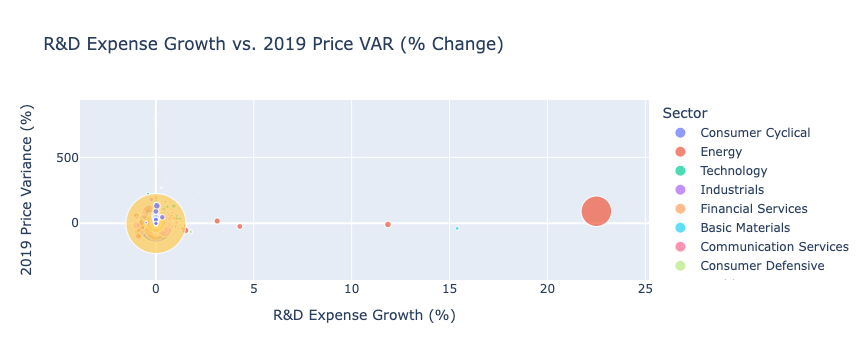

In [10]:
import plotly.express as px

# Copy the dataframe to avoid changing the original data
df_copy = data.copy()

# Replace NaN values with 0 for calculation purposes
df_copy['EBITDA Margin'] = df_copy['EBITDA Margin'].fillna(0)

# Replace negative and zero values with the smallest positive value greater than zero
min_positive = df_copy[df_copy['EBITDA Margin'] > 0]['EBITDA Margin'].min()
df_copy['EBITDA Margin'] = df_copy['EBITDA Margin'].apply(lambda x: min_positive if x <= 0 else x)

# Now, 'EBITDA Margin' contains only positive values and can be used as a size for the bubbles.
fig = px.scatter(df_copy, x='R&D Expense Growth', y='2019 PRICE VAR [%]', size='EBITDA Margin', 
                 color='Sector', hover_name='Sector', size_max=60,
                 title='R&D Expense Growth vs. 2019 Price VAR (% Change)',
                 labels={'2019 PRICE VAR [%]': '2019 Price Variance (%)',
                         'R&D Expense Growth': 'R&D Expense Growth (%)',
                         'EBITDA Margin': 'EBITDA Margin (Bubble Size)'})
fig.show()


In [11]:
import altair as alt
import pandas as pd

# Assuming 'data' is your DataFrame loaded with the dataset

# Calculate the median 'Debt to Equity' ratio for each sector
median_debt_to_equity = data.groupby('Sector')['Debt to Equity'].median().reset_index()

# Create a bar chart with Altair
chart = alt.Chart(median_debt_to_equity).mark_bar().encode(
    x=alt.X('Sector:N', sort='-y'),  # Sort sectors by median 'Debt to Equity' descending
    y=alt.Y('Debt to Equity:Q', title='Median Debt to Equity'),
    color=alt.Color('Debt to Equity:Q', scale=alt.Scale(scheme='blues')),
    tooltip=[alt.Tooltip('Sector:N', title='Sector'), alt.Tooltip('Debt to Equity:Q', title='Median Debt to Equity', format='.2f')]
).properties(
    title='Median Debt to Equity Ratio by Sector',
    width=600,
    height=400
)

# Render the chart in the notebook
chart

alt.Chart(...)

In [18]:
# Aggregate data by sector and calculate the sum of operating incomes
operating_income_by_sector = data.groupby('Sector')['Operating Income'].sum().reset_index()

# Create a histogram using Altair
chart = alt.Chart(operating_income_by_sector).mark_bar().encode(
    x=alt.X('Sector:N', sort='-y'),  # Sort bars based on the operating income
    y='Operating Income:Q',
    color='Sector:N'
).properties(
    title='Operating Income by Sector',
    width=600,
    height=400
)

# Display the chart
chart

chart.save("staticviz.html")

In [13]:

# Create a box plot using Altair
boxplot_chart = alt.Chart(data).mark_boxplot().encode(
    x='Sector:N',
    y='Operating Income:Q',
    color='Sector:N',
    tooltip=['Sector:N', 'Operating Income:Q']
).properties(
    title='Operating Income Distribution by Sector',
    width=600,
    height=400
)

boxplot_chart

alt.Chart(...)

In [14]:
operating_income_by_sector = data.groupby('Sector')['Operating Income'].sum().reset_index()


# Create a box plot using Altair
boxplot_chart = alt.Chart(operating_income_by_sector).mark_boxplot().encode(
    x='Sector:N',
    y=alt.Y('Operating Income:Q', scale=alt.Scale(zero=False)),  # Adjust the scale as needed
    color='Sector:N',
    tooltip=['Sector:N', 'Operating Income:Q']
).properties(
    title='Operating Income Distribution by Sector',
    width=600,
    height=400
)

# Display the chart
boxplot_chart

alt.Chart(...)